In [62]:
#! pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf


In [63]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [64]:
import google.generativeai as genai
from google.colab import userdata

In [65]:

import os
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

### Text Generation

In [66]:
model = genai.GenerativeModel(model_name = "gemini-pro")
#model

In [67]:
response = model.generate_content("What is disciple?")

In [68]:
to_markdown(response.text)

> **Definition:**
> 
> A disciple is a follower and student of a teacher, leader, or religious figure. They strive to learn and embody the teachings of their mentor and often play a role in spreading or carrying on the legacy of their master.
> 
> **Key Characteristics:**
> 
> * **Devotion:** Disciples have a deep commitment to their teacher and his/her teachings.
> * **Dedication:** They invest significant time and effort in learning and practicing the teachings.
> * **Emulation:** Disciples aim to model their lives after their teacher's example.
> * **Loyalty:** They remain faithful to their teacher and his/her vision, even in challenging times.
> * **Transmission:** Disciples often play a role in passing on the teachings to future generations.
> 
> **Types of Disciples:**
> 
> * **Religious:** Followers of a religious leader or prophet, such as the disciples of Jesus, Buddha, or Muhammad.
> * **Philosophical:** Students of a philosopher or intellectual, such as the disciples of Socrates, Plato, or Aristotle.
> * **Artistic:** Followers of an artist or creative visionary, such as the disciples of Picasso, Shakespeare, or Mozart.
> * **Political:** Supporters of a political leader or movement, such as the disciples of Mahatma Gandhi or Martin Luther King Jr.
> 
> **Importance of Discipleship:**
> 
> Discipleship plays a pivotal role in:
> 
> * **Preserving and sharing knowledge:** Disciples help ensure that important teachings and ideas are not lost or distorted.
> * **Inspiring and motivating:** The example of disciples can inspire others to pursue worthy goals and make a positive impact.
> * **Promoting social change:** Disciples can play a key role in spreading ideas and values that can transform communities and societies.
> * **Providing continuity:** Disciples ensure that the legacy of their teacher is carried on and evolves over time.

In [69]:
!pip install langchain_google_genai

### Use LangChain to Access Gemini API

In [70]:
from langchain_google_genai import ChatGoogleGenerativeAI
#!pip install langchain_google_genai

In [71]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",google_api_key=GOOGLE_API_KEY)

In [72]:
result = llm.invoke("What are the usecases of LLMs?")


In [73]:
to_markdown(result.content)

> ## Use Cases of LLMs (Large Language Models)
> 
> LLMs are incredibly versatile and have the potential to revolutionize various industries. Here are some key use cases:
> 
> **1. Content Creation:**
> 
> * **Writing:** Generate articles, blog posts, social media content, marketing materials, and even books.
> * **Translation:** Translate text between languages with high accuracy.
> * **Summarization:** Condense long documents into concise summaries.
> * **Code generation:** Write code in different programming languages.
> 
> **2. Customer Service & Support:**
> 
> * **Chatbots:** Create AI-powered chatbots that can answer customer questions, provide support, and resolve issues.
> * **Personalization:** Tailor customer interactions and recommendations based on their preferences and history.
> * **Sentiment analysis:** Understand customer feedback and identify areas for improvement.
> 
> **3. Education & Research:**
> 
> * **Personalized learning:** Develop adaptive learning systems that cater to individual student needs.
> * **Research assistance:** Generate research papers, summaries, and citations.
> * **Language learning:** Provide interactive language learning tools and personalized feedback.
> 
> **4. Business & Marketing:**
> 
> * **Market research:** Analyze customer data and identify trends.
> * **Predictive analytics:** Forecast future sales, demand, and other business metrics.
> * **Targeted advertising:** Generate personalized ads and content based on user profiles.
> 
> **5. Healthcare:**
> 
> * **Medical diagnosis:** Assist doctors in identifying potential diagnoses based on patient symptoms.
> * **Drug discovery:** Develop new drugs and therapies by analyzing existing data.
> * **Patient communication:** Provide patients with information and support in a personalized manner.
> 
> **6. Legal & Finance:**
> 
> * **Legal research:** Analyze legal documents and identify relevant precedents.
> * **Financial analysis:** Analyze financial data and identify investment opportunities.
> * **Fraud detection:** Identify suspicious transactions and prevent financial crimes.
> 
> **7. Creative Industries:**
> 
> * **Storytelling:** Generate creative writing prompts, develop characters, and write scripts.
> * **Music composition:** Compose original music pieces and generate melodies.
> * **Art generation:** Create unique artwork based on text prompts.
> 
> **8. Other Applications:**
> 
> * **Accessibility:** Develop tools for people with disabilities, such as text-to-speech and speech-to-text software.
> * **Data analysis:** Extract insights from large datasets and identify patterns.
> * **Robotics:** Develop AI-powered robots that can interact with their environment and perform tasks.
> 
> **It's important to note that LLMs are still under development and have limitations.** They can sometimes generate incorrect or biased information, and it's essential to use them responsibly and critically evaluate their outputs. 
> 
> As LLMs continue to evolve, we can expect to see even more innovative and impactful use cases emerge in the future.


### Using LLM to describe the image

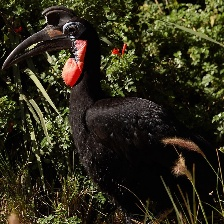

In [74]:
import PIL.Image

img= PIL.Image.open('/content/028.jpg')
img


In [99]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Give More information about the image",
        },  # You can optionally provide text parts
        {
            "type": "image_url",
            "image_url": '/content/028.jpg',
         },
    ]
)

response=llm.invoke([message])
clean_content = response.content.strip()  # Removes leading/trailing whitespaces and newlines

# Print the cleaned content
print(clean_content)

The image shows a Southern ground hornbill, a large bird native to sub-Saharan Africa.  The Southern ground hornbill is the largest of all hornbills, and is characterized by its large, black body, long, curved beak, and bright red wattle. It is a social bird that lives in small groups, and is known for its loud, booming calls. The Southern ground hornbill is an important scavenger in its ecosystem, and plays a vital role in controlling populations of insects and rodents.


## Chat with Documents using RAG (Retreival Augment Generation)

In [78]:
!pip install langchain-community

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [79]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA



warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

In [80]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [81]:
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash",google_api_key=GOOGLE_API_KEY,
                             temperature=0.2,convert_system_message_to_human=True)


In [82]:
!pip install pypdf

### Extract text from the PDF

In [83]:
pdf_loader = PyPDFLoader("/content/One_Indian_Girl_-_Chetan_Bhagat-Redicals.pdf")
pages = pdf_loader.load_and_split()
print(pages[3].page_content)


All rights reserved.
No part of this book may be reproduced, or stored in a retrieval system, or transmitted in any form or
by any means, electronic, mechanical, photocopying, recording, or otherwise, without express written
permission of the publisher.
Published by Amazon Publishing, Seattle


In [84]:
len(pages)

228

### RAG Pipeline: Embedding + Gemini (LLM)

In [85]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [86]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [87]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GOOGLE_API_KEY)

In [88]:
#!pip install langchain  # Replace 'your_module' with the correct module name
from langchain.vectorstores import Chroma

In [89]:
!pip install chromadb


In [101]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k":5})


In [91]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True

)

In [92]:
question = "give me the one line story of this book"
result = qa_chain({"query": question})
result["result"]

'Radhika, a young, ambitious woman working in the Distressed Debt Group at Goldman Sachs, finds herself torn between her career and a complicated relationship with her boyfriend, Debu, while also navigating the complexities of a new, confidential deal with a powerful businessman in the Philippines. \n'

In [93]:
Markdown(result["result"])

Radhika, a young, ambitious woman working in the Distressed Debt Group at Goldman Sachs, finds herself torn between her career and a complicated relationship with her boyfriend, Debu, while also navigating the complexities of a new, confidential deal with a powerful businessman in the Philippines. 


In [100]:
#result["source_documents"]

In [96]:
question = "what are the characters in this story?"
result = qa_chain({"query": question})
result["result"]

'The characters in this story are Radhika, Debu, Craig, Amanda, Jonathan, Clark, Dirk, Neel, and Mini-me. \nThanks for asking! \n'

In [97]:
Markdown(result["result"])

The characters in this story are Radhika, Debu, Craig, Amanda, Jonathan, Clark, Dirk, Neel, and Mini-me. 
Thanks for asking! 
